### Part 1:

##### finding frequency of unigrams of the input paragraph:

In [56]:
# Define the input paragraph
input_paragraph <- "The power of words cannot be underestimated. Language is a critical component of human communication,
and natural language processing (NLP) is a field that seeks to understand and enhance our ability
to communicate through language. NLP involves developing algorithms and computational models that can
analyze, interpret, and generate human language. One of the most common tasks in NLP is text classification.
In this task, an algorithm is trained to automatically assign predefined categories or labels to a given text.
For example, a text classification algorithm may be trained to identify whether an email is spam or not,
based on the content of the email. Another important task in NLP is named entity recognition (NER). NER
involves identifying and classifying named entities in a text, such as people, organizations, and locations.
This task is useful in applications such as information extraction and text-to-speech synthesis. Other tasks in
NLP include sentiment analysis, machine translation, and text summarization. Sentiment analysis involves
determining the sentiment or emotion expressed in a given text, such as positive or negative. Machine
translation involves automatically translating text from one language to another, while text summarization
involves generating a brief summary of a longer text. In order to perform these tasks, NLP algorithms
typically rely on statistical models and machine learning techniques. These techniques involve training the
algorithm on large amounts of data, so that it can learn to recognize patterns and make accurate predictions."

# Convert the input paragraph to lowercase
input_paragraph <- tolower(input_paragraph)

# Remove punctuation marks from the input paragraph
input_paragraph <- gsub('[^[:alnum:] ]+', '', input_paragraph)

# Split the input paragraph into individual words
words <- strsplit(input_paragraph, "\\s+")

# Flatten the list of words
words <- unlist(words)

# Create a table of word frequencies
word_freq <- table(words)

# Create a dataframe of the top 10 most common words
top_words <- data.frame(word = names(head(sort(word_freq, decreasing = TRUE), 10)), 
                         frequency = as.vector(head(sort(word_freq, decreasing = TRUE), 10)))

# Print the dataframe of the top 10 most common words
print(top_words)

       word frequency
1       and         9
2         a         8
3      text         8
4        is         7
5        to         7
6        in         6
7        of         6
8  language         5
9       nlp         5
10      the         5


##### horizontal bar chart of the top 10 most frequent unigrams:

In [57]:
library(ggplot2) 
theme_set(theme_bw())

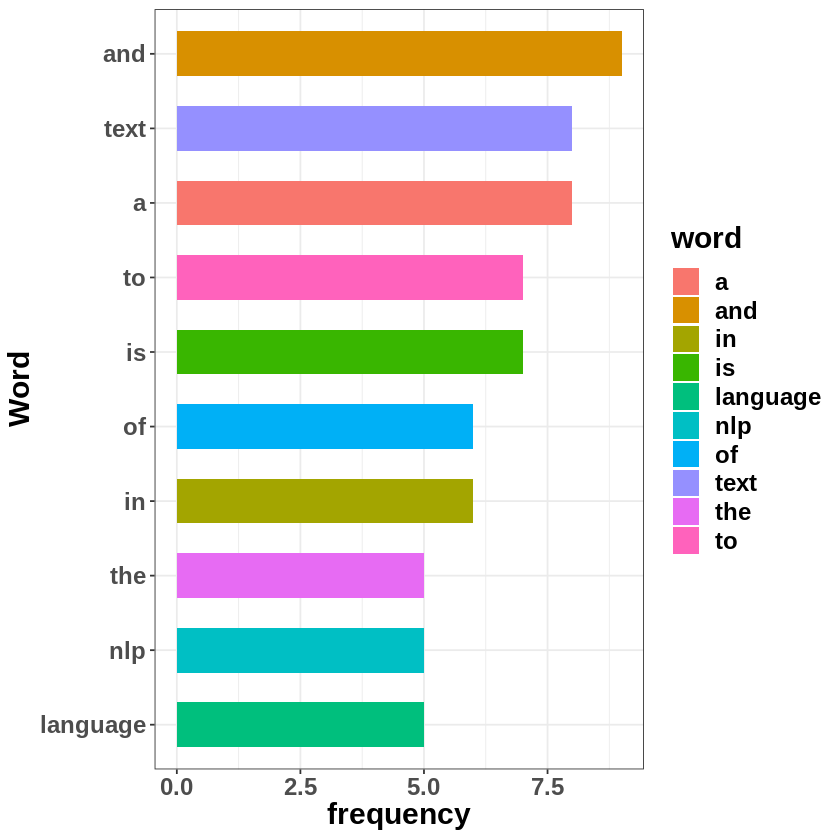

In [58]:
p <- ggplot(top_words, aes(x = reorder(word, frequency), y = frequency, fill = word))+
  geom_col(width = 0.6)+
  theme(text = element_text(face = "bold", size = 18))+
  labs(x = "Word")

p + coord_flip()

### Part 2:

##### splitting the input text into sentences based on dots, and splitting the sentences into words

In [59]:
# Define the input paragraph
input_paragraph <- "The power of words cannot be underestimated. Language is a critical component of human communication,
and natural language processing (NLP) is a field that seeks to understand and enhance our ability
to communicate through language. NLP involves developing algorithms and computational models that can
analyze, interpret, and generate human language. One of the most common tasks in NLP is text classification.
In this task, an algorithm is trained to automatically assign predefined categories or labels to a given text.
For example, a text classification algorithm may be trained to identify whether an email is spam or not,
based on the content of the email. Another important task in NLP is named entity recognition (NER). NER
involves identifying and classifying named entities in a text, such as people, organizations, and locations.
This task is useful in applications such as information extraction and text-to-speech synthesis. Other tasks in
NLP include sentiment analysis, machine translation, and text summarization. Sentiment analysis involves
determining the sentiment or emotion expressed in a given text, such as positive or negative. Machine
translation involves automatically translating text from one language to another, while text summarization
involves generating a brief summary of a longer text. In order to perform these tasks, NLP algorithms
typically rely on statistical models and machine learning techniques. These techniques involve training the
algorithm on large amounts of data, so that it can learn to recognize patterns and make accurate predictions."

# split text into sentences based on dots
sentences <- strsplit(input_paragraph, "\\.")[[1]]

print(sentences)

 [1] "The power of words cannot be underestimated"                                                                                                                                                  
 [2] " Language is a critical component of human communication,\nand natural language processing (NLP) is a field that seeks to understand and enhance our ability\nto communicate through language"
 [3] " NLP involves developing algorithms and computational models that can\nanalyze, interpret, and generate human language"                                                                       
 [4] " One of the most common tasks in NLP is text classification"                                                                                                                                  
 [5] "\nIn this task, an algorithm is trained to automatically assign predefined categories or labels to a given text"                                                                              
 [6] "\nFor exa

In [60]:
# split each sentence into words and calculate the length of each word
word_lengths <- lapply(sentences, function(sentence) {
  # remove punctuation marks other than periods and commas
  sentence <- gsub("[^[:alnum:][:punct:].,]", " ", sentence)
  # split sentence into words
  words <- strsplit(sentence, "\\s+")[[1]]
  # calculate the length of each word
  lengths <- nchar(words)
  return(lengths)
})

# create a dataframe of word lengths for each sentence
df <- data.frame(sentence = rep(1:length(word_lengths), sapply(word_lengths, length)),
                 word_length = unlist(word_lengths))

print(df)

    sentence word_length
1          1           3
2          1           5
3          1           2
4          1           5
5          1           6
6          1           2
7          1          14
8          2           0
9          2           8
10         2           2
11         2           1
12         2           8
13         2           9
14         2           2
15         2           5
16         2          14
17         2           3
18         2           7
19         2           8
20         2          10
21         2           5
22         2           2
23         2           1
24         2           5
25         2           4
26         2           5
27         2           2
28         2          10
29         2           3
30         2           7
31         2           3
32         2           7
33         2           2
34         2          11
35         2           7
36         2           8
37         3           0
38         3           3
39         3           8


In [61]:
# the rows with word_length = 0 are made because of the "\n"s that were removed. So they are not valid. And should be removed.
df = df[df$word_length != 0, ]
df

,sentence,word_length
,<int>,<int>
1,1,3
2,1,5
3,1,2
4,1,5
5,1,6
6,1,2
7,1,14
9,2,8
10,2,2


In [62]:
#reordeing the indexes
rownames(df) <- 1:nrow(df)
df  

,sentence,word_length
,<int>,<int>
1,1,3
2,1,5
3,1,2
4,1,5
5,1,6
6,1,2
7,1,14
8,2,8
9,2,2


##### boxplot based on the character length of each word in each sentence:

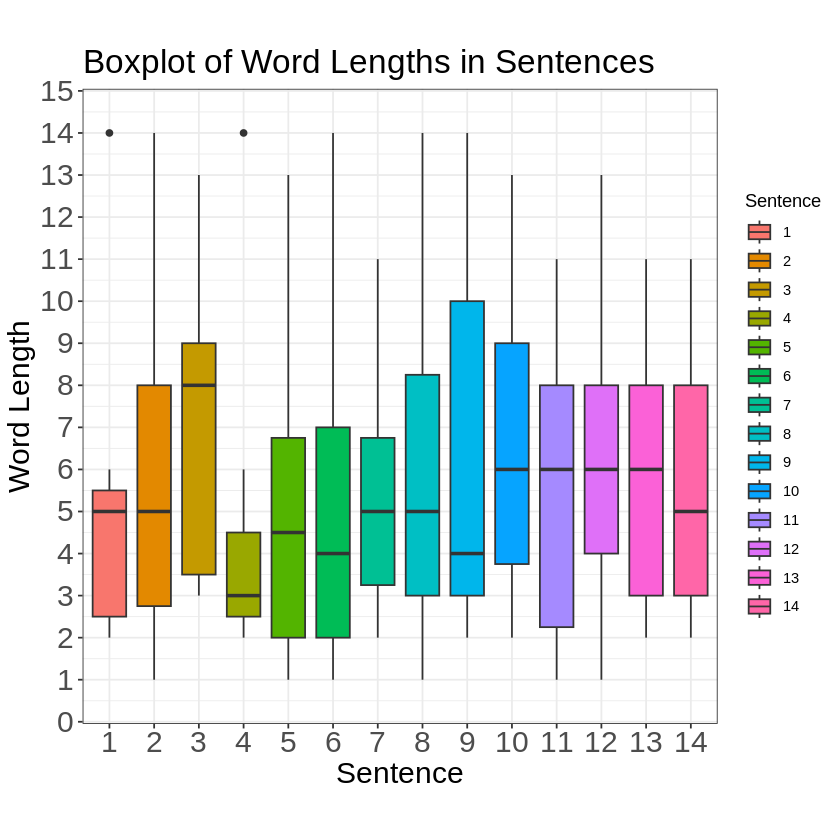

In [89]:
ggplot(df, aes(x = factor(sentence), y = word_length, fill = factor(sentence))) + 
  geom_boxplot() +
  labs(title = "Boxplot of Word Lengths in Sentences",
       x = "Sentence",
       y = "Word Length",
       fill = "Sentence") +
  theme(plot.title = element_text(size = 20),
        axis.title = element_text(size = 18),
        axis.text = element_text(size = 18),
        aspect.ratio = 1) +
  scale_y_continuous(limits = c(0, max(df$word_length) + 1), expand = c(0, 0.05), breaks = seq(0, max(df$word_length) + 2, by = 1)) +
  guides(fill = guide_legend(title = "Sentence"))